In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.distributions import uniform
import torch

In [3]:
import sys
sys.path.append("../")

In [4]:
from generate_timeseries import Periodic_1d

In [5]:
max_t_extrap = 5.0
n_total_tp = 100

distribution = uniform.Uniform(torch.Tensor([0.0]),torch.Tensor([max_t_extrap]))
time_steps_extrap =  distribution.sample(torch.Size([n_total_tp-1]))[:,0]
time_steps_extrap = torch.cat((torch.Tensor([0.0]), time_steps_extrap))
time_steps_extrap = torch.sort(time_steps_extrap)[0]

dataset_obj = None
##################################################################
# Sample a periodic function
dataset_obj = Periodic_1d(
    init_freq = None, init_amplitude = 1.,
    final_amplitude = 1., final_freq = None, 
    z0 = 1.)

In [20]:
n = 3
noise_weight = 0.5
dataset = dataset_obj.sample_traj(time_steps_extrap, n_samples = n, 
    noise_weight = noise_weight)

In [21]:
dataset.shape

torch.Size([3, 100, 1])

In [22]:
time_steps_extrap.shape

torch.Size([100])

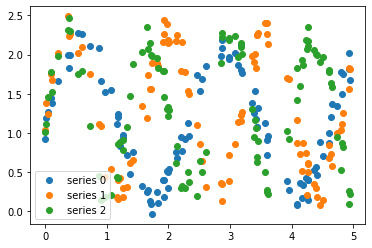

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure()


for i, series in enumerate(dataset):
    plt.scatter(time_steps_extrap, series[:, 0], label=f"series {i}" )

plt.legend()